# Used Car Price Prediction

In [1]:
# Importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# --Data loading--

data = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/05/used-car-price.csv')
df = data.copy()

In [3]:
df.head().T

,0,1,2,3,4
make_year,2001,2014,2023,2009,2005
mileage_kmpl,8.17,17.59,18.09,11.28,12.23
engine_cc,4000,1500,2500,800,1000
fuel_type,Petrol,Petrol,Diesel,Petrol,Petrol
owner_count,4,4,5,1,2
price_usd,8587.64,5943.5,9273.58,6836.24,4625.79
brand,Chevrolet,Honda,BMW,Hyundai,Nissan
transmission,Manual,Manual,Automatic,Manual,Automatic
color,White,Black,Black,Blue,Red
service_history,NaN,NaN,Full,Full,Full


In [4]:
df.shape

(10000, 12)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [7]:
# Splitting into Numerical and Categorical features
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

In [8]:
df_num.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
0,2001,8.17,4000,4,8587.64,0
1,2014,17.59,1500,4,5943.50,0
2,2023,18.09,2500,5,9273.58,1
3,2009,11.28,800,1,6836.24,0
4,2005,12.23,1000,2,4625.79,0


In [9]:
df_cat.head()

,fuel_type,brand,transmission,color,service_history,insurance_valid
0,Petrol,Chevrolet,Manual,White,NaN,No
1,Petrol,Honda,Manual,Black,NaN,Yes
2,Diesel,BMW,Automatic,Black,Full,Yes
3,Petrol,Hyundai,Manual,Blue,Full,Yes
4,Petrol,Nissan,Automatic,Red,Full,Yes


In [10]:
df_num.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [11]:
print('-------- Missing value count in Numerical features ----------')
print(df_num.isna().sum().sum())

-------- Missing value count in Numerical features ----------
0


In [12]:
print('-------- Missing value count before Imputation ----------')
print(df_cat.isna().sum().sum())

# Imputing missing values of categorical feature with mode
impute_cols = ['service_history']
for col in df_cat.columns:
    if col in impute_cols:
        df_cat[col] = df_cat[col].fillna(df_cat[col].mode()[0])

print('-------- Missing value count before Imputation ----------')
print(df_cat.isna().sum().sum())

-------- Missing value count before Imputation ----------
2038
-------- Missing value count before Imputation ----------
0


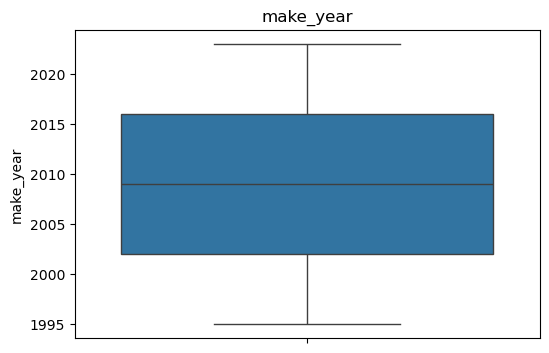

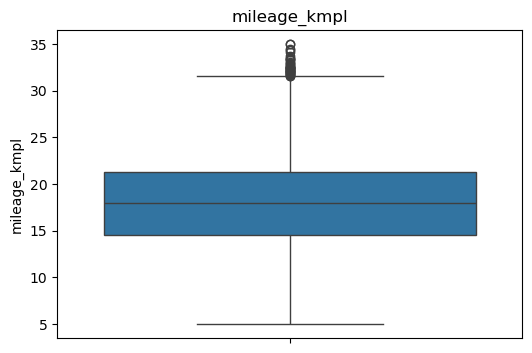

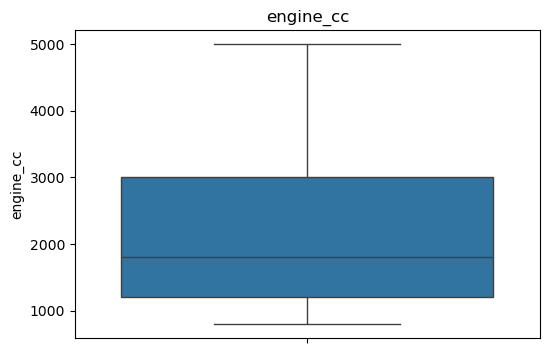

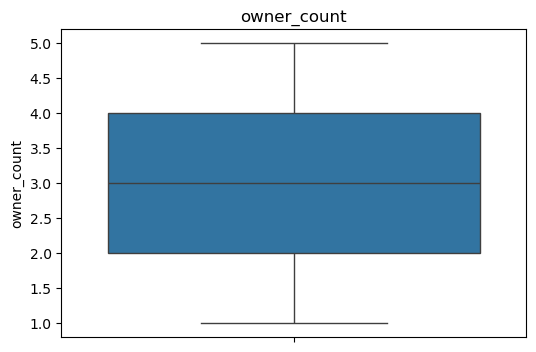

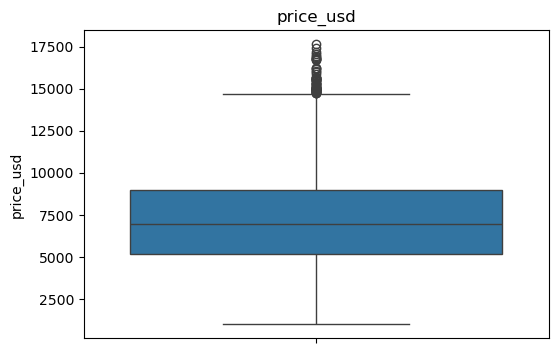

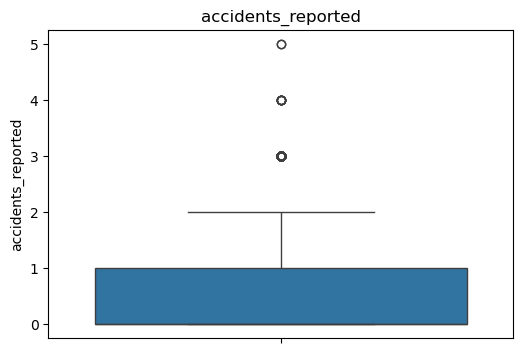

In [13]:
# Clipping Outliers of numerical features using IQR method

# Detecting Outliers using boxplot
for col in df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_num[col])
    plt.title(col)
    plt.show()

# Clipping using IQR for (price_usd)
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

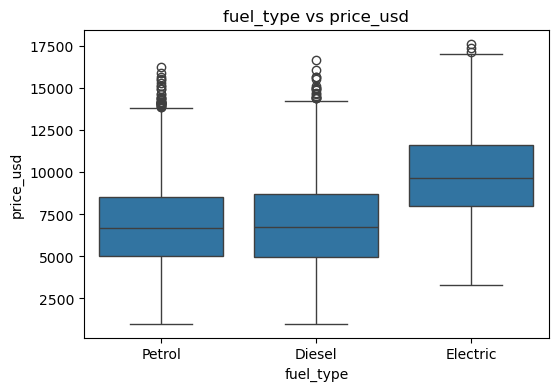

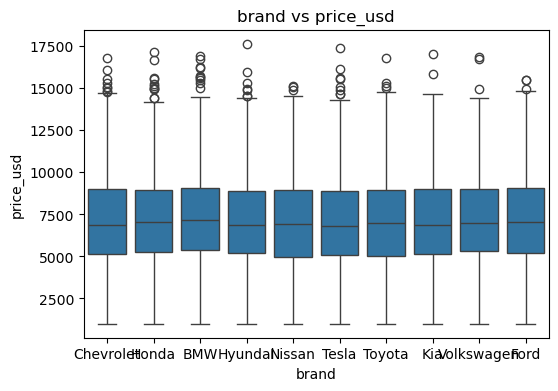

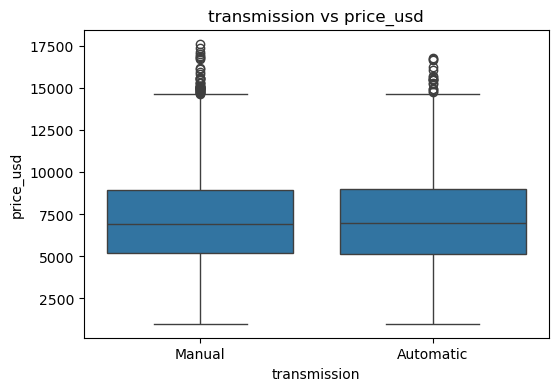

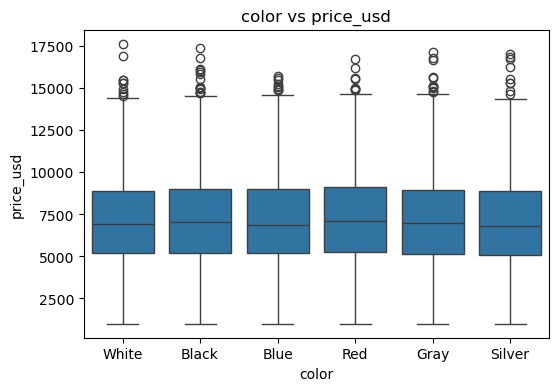

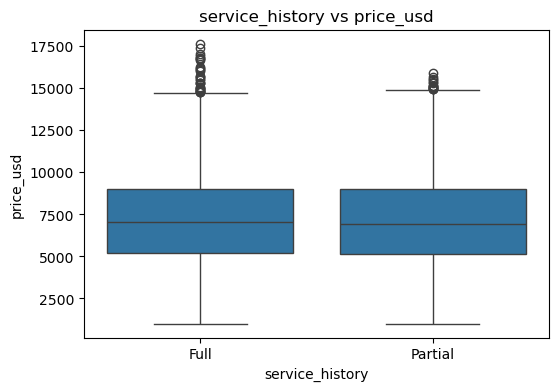

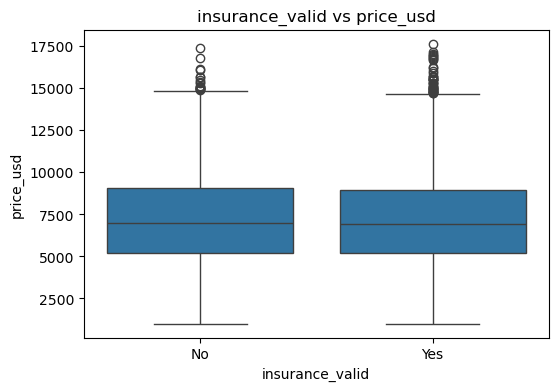

In [14]:
# Visualize 'price_usd' distribution across categorical feature levels


for col in df_cat.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='price_usd', data=df)
    plt.title(f'{col} vs price_usd')
    plt.xlabel(col)
    plt.ylabel('price_usd')
    plt.show()

- **INSIGHTS**
    - Strong Predictors: Boxes have step up
        - fuel_type
    - Weak Predictors:   Boxes are at 'almost' same place
        - brand
        - color
    - Negligible:        Boxes at same range
        - insurance_valid
        - service_history
        - transmission

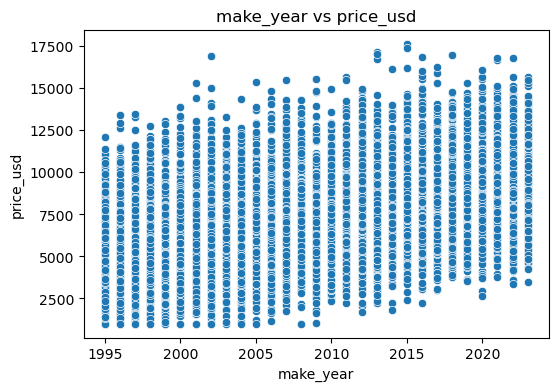

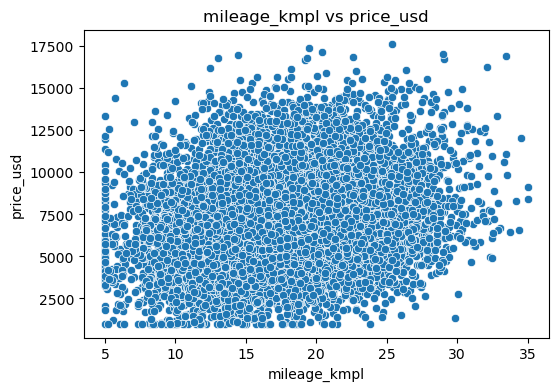

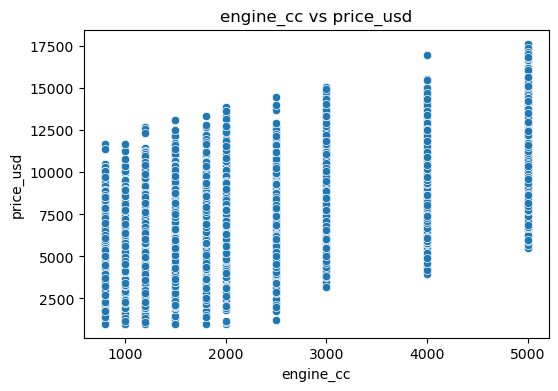

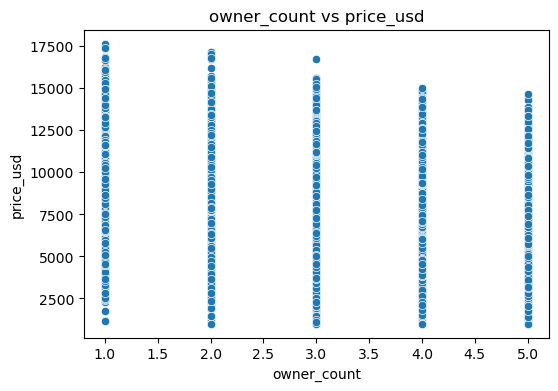

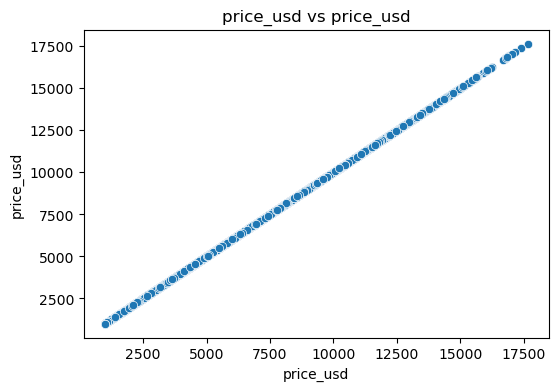

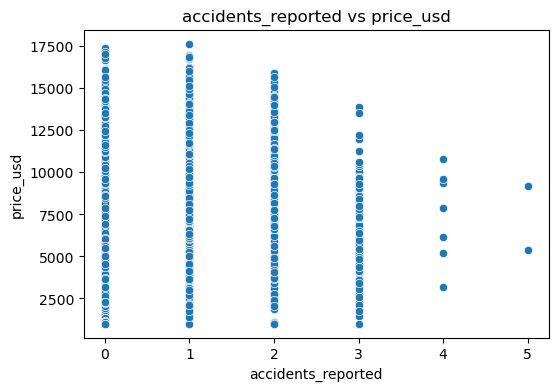

In [15]:
# Visualize 'price_usd' across numerical features


for col in df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='price_usd', data=df_num)
    plt.title(f'{col} vs price_usd')
    plt.xlabel(col)
    plt.ylabel('price_usd')
    plt.show()

- **INSIGHTS**
    - Strong Predictors
        - engine_cc
        - make_year
        - owner_count
        - accidents_reported
    - Weak Predictor
        - mileage_kmpl

In [16]:
print("-------- Unique values of Categorical feature Before Encoding --------")
for col in df_cat.columns:
    print(col, df_cat[col].unique())

-------- Unique values of Categorical feature Before Encoding --------
fuel_type ['Petrol' 'Diesel' 'Electric']
brand ['Chevrolet' 'Honda' 'BMW' 'Hyundai' 'Nissan' 'Tesla' 'Toyota' 'Kia'
 'Volkswagen' 'Ford']
transmission ['Manual' 'Automatic']
color ['White' 'Black' 'Blue' 'Red' 'Gray' 'Silver']
service_history ['Full' 'Partial']
insurance_valid ['No' 'Yes']


In [17]:
# Label encoding binary features
from sklearn.preprocessing import LabelEncoder

df_bin = ['insurance_valid', 'service_history', 'transmission']
for col in df_cat.columns:
    if col in df_bin:
        le = LabelEncoder()
        df_cat[col] = le.fit_transform(df_cat[col])


# One hot encoding multi-category features (nominal)
df_cat = pd.get_dummies(df_cat, columns=['fuel_type', 'color', 'brand'], drop_first=True, dtype='int')

In [18]:
print("-------- Unique values of Categorical feature After Encoding --------")
for col in df_cat.columns:
    print(col, df_cat[col].unique())

-------- Unique values of Categorical feature After Encoding --------
transmission [1 0]
service_history [0 1]
insurance_valid [0 1]
fuel_type_Electric [0 1]
fuel_type_Petrol [1 0]
color_Blue [0 1]
color_Gray [0 1]
color_Red [0 1]
color_Silver [0 1]
color_White [1 0]
brand_Chevrolet [1 0]
brand_Ford [0 1]
brand_Honda [0 1]
brand_Hyundai [0 1]
brand_Kia [0 1]
brand_Nissan [0 1]
brand_Tesla [0 1]
brand_Toyota [0 1]
brand_Volkswagen [0 1]


In [19]:
df = pd.concat([df_num, df_cat], axis=1)

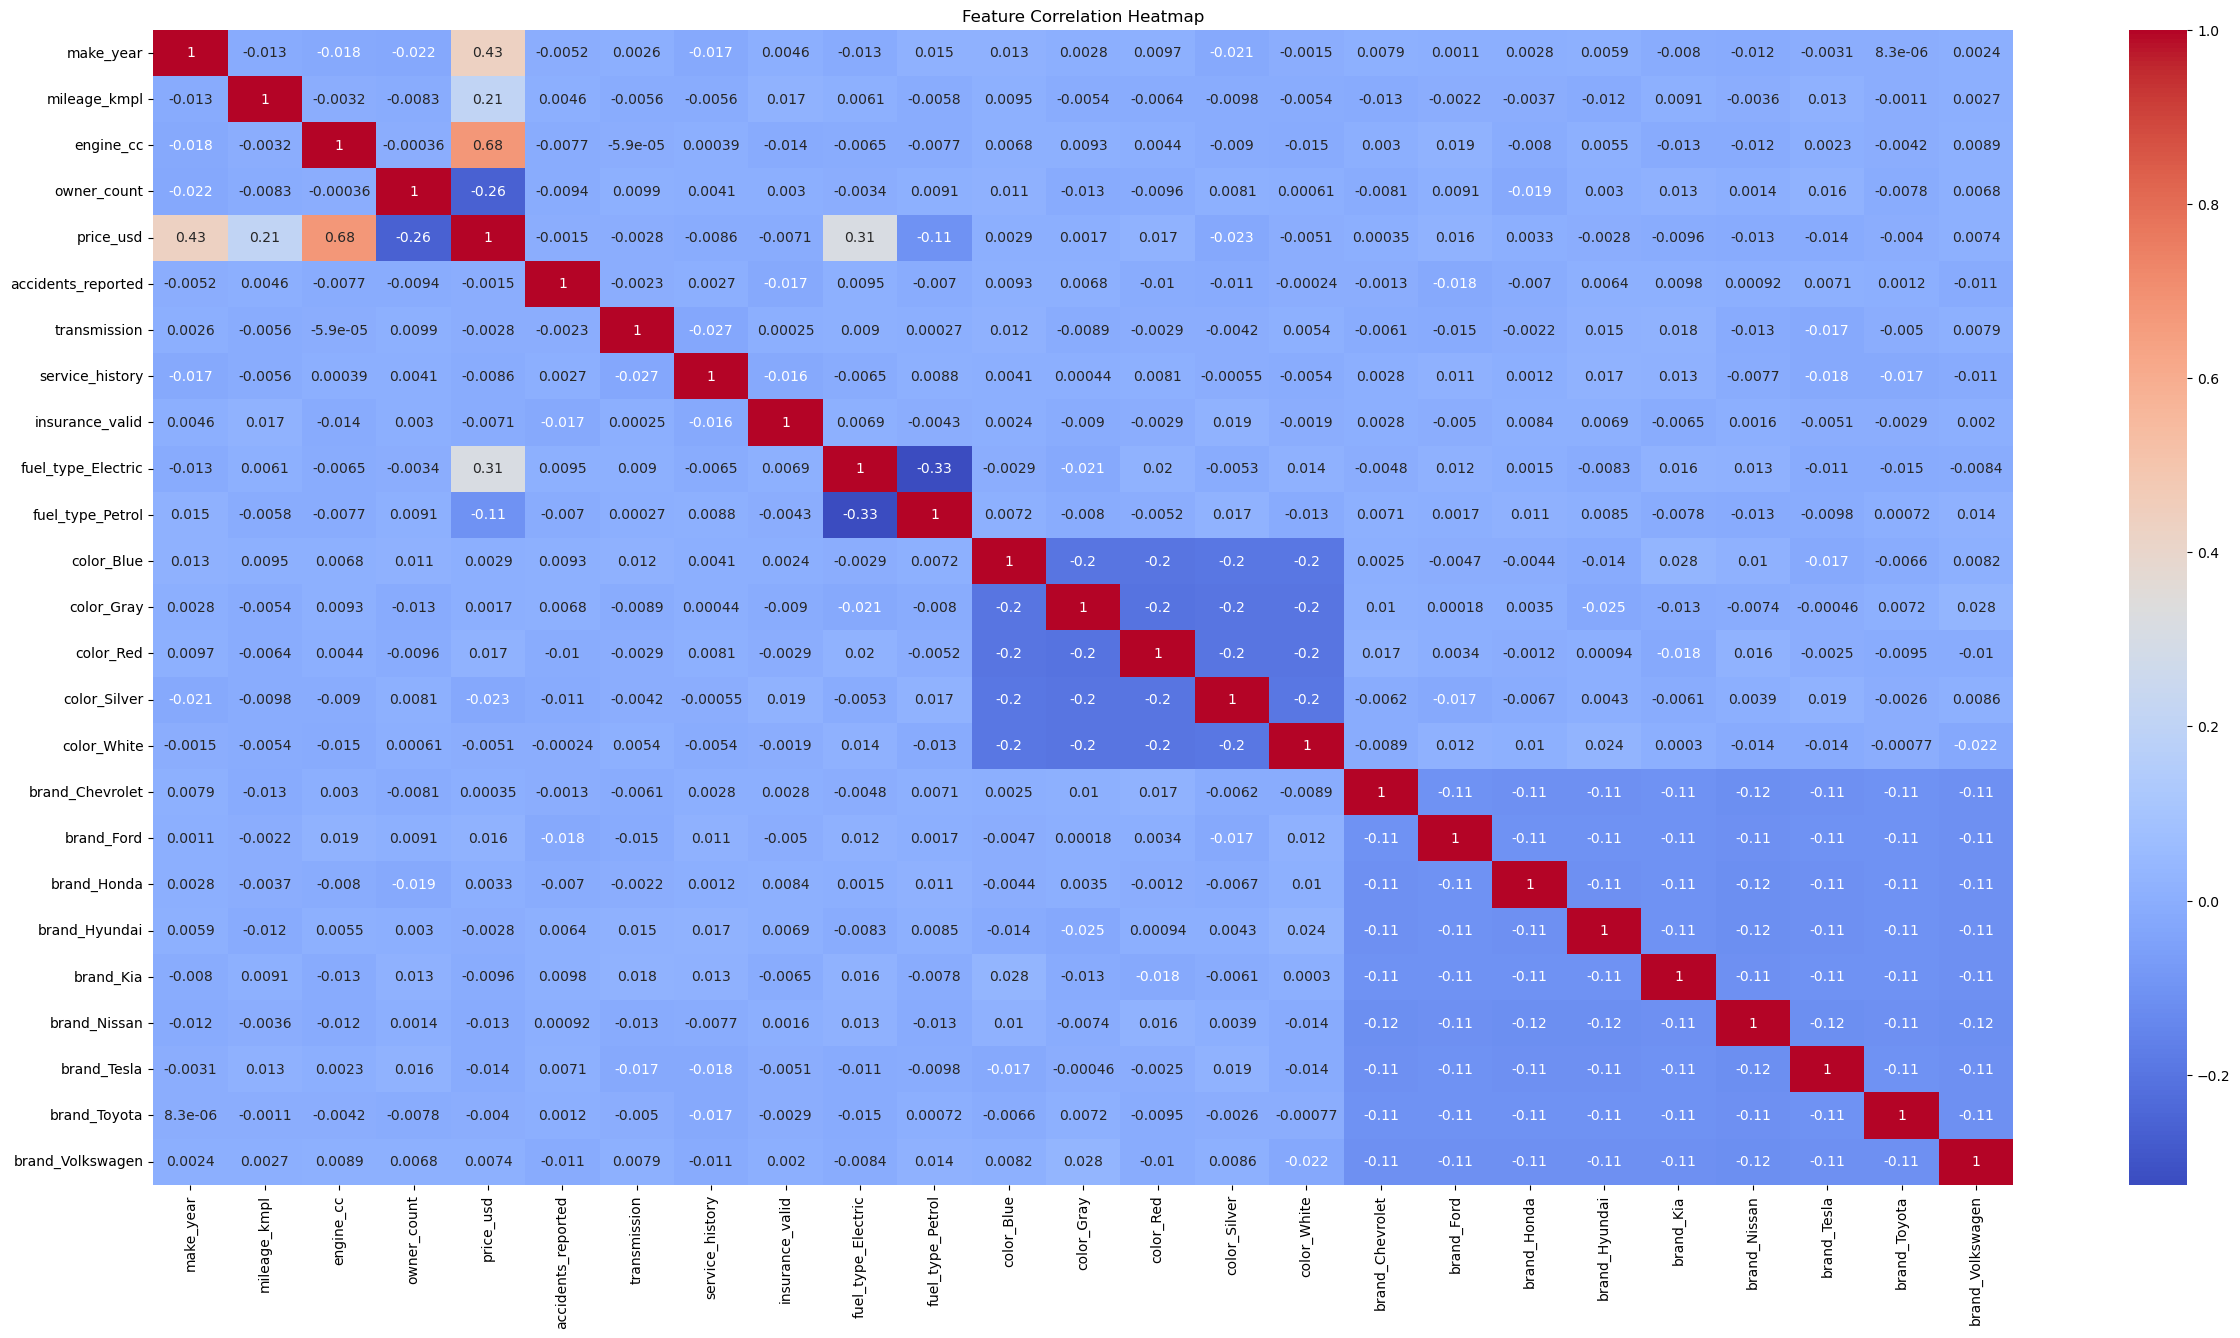

In [20]:
# Visualizing correlation between features

plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split

X = df.drop(['price_usd'], axis=1)
y = df['price_usd']

# Standardization of training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


models = {
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(alpha=2),
    'Lasso':Lasso(alpha=2)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'R2 Score':r2_score(y_test, y_pred),
        'MAE':mean_absolute_error(y_test, y_pred),
        'MSE':mean_squared_error(y_test, y_pred),
        'RMSE':root_mean_squared_error(y_test, y_pred)
    }
    

In [23]:
results_df = pd.DataFrame(results)
print(results_df.T)

                   R2 Score         MAE            MSE        RMSE
Linear Regression  0.876648  790.800540  981328.481566  990.620251
Ridge              0.876648  790.811695  981327.280484  990.619645
Lasso              0.876628  791.160844  981490.924595  990.702238


In [24]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

results['Polynomial Regression'] = {
        'R2 Score':r2_score(y_test, y_pred),
        'MAE':mean_absolute_error(y_test, y_pred),
        'MSE':mean_squared_error(y_test, y_pred),
        'RMSE':root_mean_squared_error(y_test, y_pred)
}

In [25]:
results_df = pd.DataFrame(results)
print(results_df.T)

                       R2 Score         MAE           MSE         RMSE
Linear Regression      0.876648  790.800540  9.813285e+05   990.620251
Ridge                  0.876648  790.811695  9.813273e+05   990.619645
Lasso                  0.876628  791.160844  9.814909e+05   990.702238
Polynomial Regression  0.873007  800.210429  1.010298e+06  1005.135824


In [26]:
best_model = results_df.T['RMSE'].idxmin()
print(best_model)

Ridge


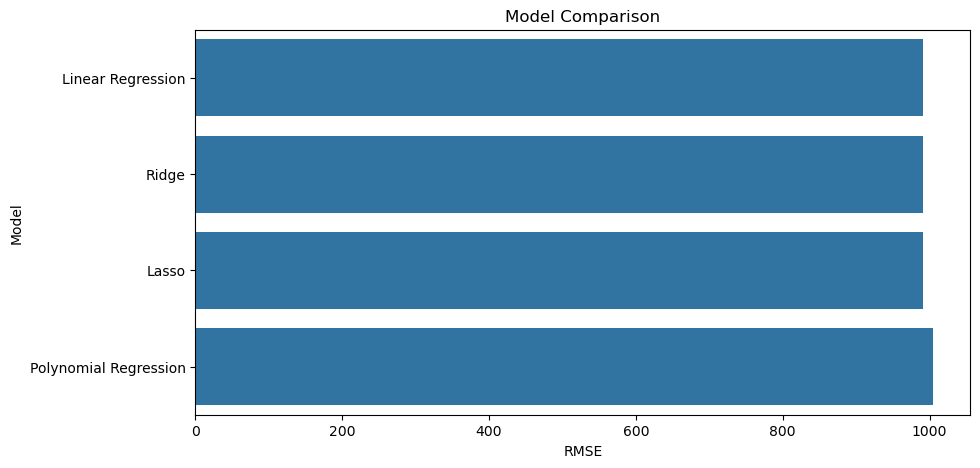

In [27]:
# Visualize model comparison

rmse = results_df.loc['RMSE'] 
plt.figure(figsize=(10, 5))
sns.barplot(x=rmse.values, y=rmse.index)
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()

- **Summary**
    - Best Model: Ridge Regression was identified as the most stable model with the lowest RMSE.